# ***TALLER ARBOLES***


**1. Elabore un programa en python para crear árboles haciendo uso de listas enlazadas. Los nodos serán ingresados por teclado. Debe tener los métodos para:**

    a) Peso del árbol

    b) Orden

    c) Altura

In [2]:
class Node:
    def __init__(self, data):
        self.data = data
        self.children = []


class Tree:
    def __init__(self):
        self.root = None

    def insert(self, data, parent=None):
        new_node = Node(data)

        if not self.root:
            self.root = new_node
        else:
            if parent is None:
                self.root.children.append(new_node)
            else:
                parent_node = self.find_node(parent, self.root)
                if parent_node:
                    parent_node.children.append(new_node)
                else:
                    print("Padre no encontrado. El nodo será insertado en la raíz.")

    def find_node(self, data, node):
        if node.data == data:
            return node

        for child in node.children:
            result = self.find_node(data, child)
            if result:
                return result

        return None

    def weight(self):
        return self.count_nodes(self.root)

    def count_nodes(self, node):
        count = 1
        for child in node.children:
            count += self.count_nodes(child)
        return count

    def order(self):
        if not self.root:
            return []

        result = []
        queue = [self.root]

        while queue:
            node = queue.pop(0)
            result.append(node.data)
            queue.extend(node.children)

        return result

    def height(self):
        return self.calculate_height(self.root)

    def calculate_height(self, node):
        if not node:
            return 0

        if not node.children:
            return 1

        heights = []
        for child in node.children:
            heights.append(self.calculate_height(child))

        return 1 + max(heights)


# Ejemplo de uso del programa
tree = Tree()

print("Ingrese los nodos y su padre (ingrese 'fin' para terminar):")
while True:
    data = input("Nodo: ")
    if data == "fin":
        break

    parent = input("Padre (deje en blanco para raíz): ")
    if parent == "":
        parent = None

    tree.insert(data, parent)

print("Peso del árbol:", tree.weight())
print("Orden del árbol:", tree.order())
print("Altura del árbol:", tree.height())

Ingrese los nodos y su padre (ingrese 'fin' para terminar):
Peso del árbol: 7
Orden del árbol: ['1', '2', '3', '4', '5', '6', '7']
Altura del árbol: 3


Ingrese los nodos y su padre (ingrese 'fin' para terminar):


Peso del árbol: 8
Orden del árbol: ['1', '2', '3', '4', '5', '8', '6', '7']
Altura del árbol: 3


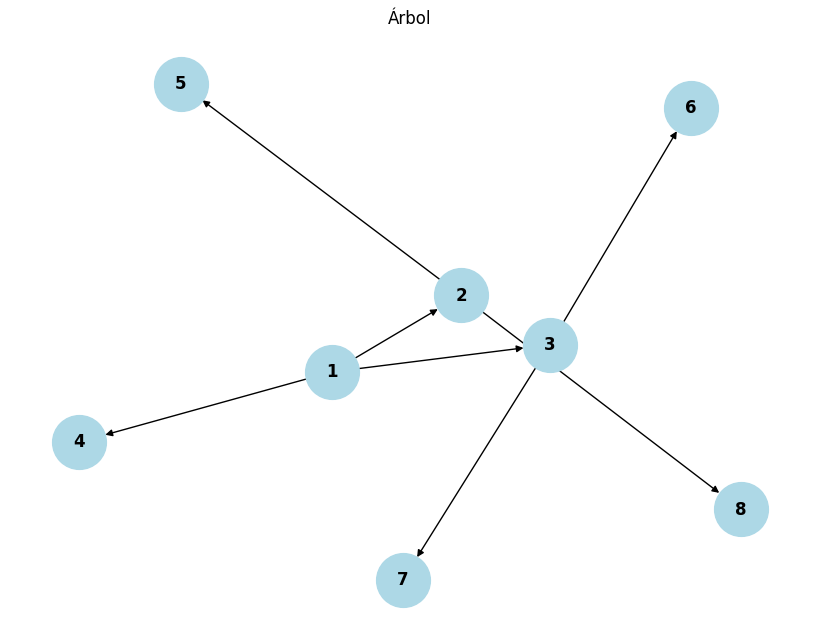

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data):
        self.data = data
        self.children = []

class Tree:
    def __init__(self):
        self.root = None

    def insert(self, data, parent=None):
        new_node = Node(data)

        if not self.root:
            self.root = new_node
        else:
            if parent is None:
                self.root.children.append(new_node)
            else:
                parent_node = self.find_node(parent, self.root)
                if parent_node:
                    parent_node.children.append(new_node)
                else:
                    print("Padre no encontrado. El nodo será insertado en la raíz.")

    def find_node(self, data, node):
        if node.data == data:
            return node

        for child in node.children:
            result = self.find_node(data, child)
            if result:
                return result

        return None

    def weight(self):
        return self.count_nodes(self.root)

    def count_nodes(self, node):
        count = 1
        for child in node.children:
            count += self.count_nodes(child)
        return count

    def order(self):
        if not self.root:
            return []

        result = []
        queue = [self.root]

        while queue:
            node = queue.pop(0)
            result.append(node.data)
            queue.extend(node.children)

        return result

    def height(self):
        return self.calculate_height(self.root)

    def calculate_height(self, node):
        if not node:
            return 0

        if not node.children:
            return 1

        heights = []
        for child in node.children:
            heights.append(self.calculate_height(child))

        return 1 + max(heights)


# Ejemplo de uso del programa
tree = Tree()

print("Ingrese los nodos y su padre (ingrese 'fin' para terminar):")
while True:
    data = input("Nodo: ")
    if data == "fin":
        break

    parent = input("Padre (deje en blanco para raíz): ")
    if parent == "":
        parent = None

    tree.insert(data, parent)

print("Peso del árbol:", tree.weight())
print("Orden del árbol:", tree.order())
print("Altura del árbol:", tree.height())

# Crear y mostrar el gráfico del árbol
def create_tree_graph(tree):
    G = nx.DiGraph()

    def add_nodes_edges(node):
        if node:
            G.add_node(node.data)
            for child in node.children:
                G.add_edge(node.data, child.data)
                add_nodes_edges(child)

    add_nodes_edges(tree.root)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=1500, node_color='lightblue', font_size=12, font_weight='bold')
    plt.title('Árbol')

    plt.show()

create_tree_graph(tree)


**2. Realice una consulta sobre las formas de recorrer un árbol. Realice un ejemplo de alguno de ellos.**

**Formas de recorrer un arbol:**

* ***Recorrido en profundidad (depth-first traversal):*** El recorrido en profundidad es una técnica para visitar todos los nodos de un árbol de manera sistemática, priorizando la exploración en la profundidad del árbol antes de avanzar hacia los niveles más bajos. Hay tres variantes comunes de recorrido en profundidad:

    * ***Recorrido en preorden (preorder traversal):*** En este tipo de recorrido, se visita primero el nodo raíz y luego se visitan recursivamente los subárboles izquierdo y derecho en ese orden. Por lo tanto, el recorrido sigue el orden: raíz, subárbol izquierdo, subárbol derecho.

    * ***Recorrido en inorden (inorder traversal):*** En este tipo de recorrido, se visita primero el subárbol izquierdo, luego el nodo raíz y finalmente el subárbol derecho. Por lo tanto, el recorrido sigue el orden: subárbol izquierdo, raíz, subárbol derecho.

    * ***Recorrido en postorden (postorder traversal):*** En este tipo de recorrido, se visita primero el subárbol izquierdo, luego el subárbol derecho y finalmente el nodo raíz. Por lo tanto, el recorrido sigue el orden: subárbol izquierdo, subárbol derecho, raíz.


* ***Recorrido en anchura (breadth-first traversal):*** El recorrido en anchura, también conocido como recorrido por niveles, es una técnica para visitar todos los nodos de un árbol de manera secuencial, nivel por nivel. Comienza por visitar el nodo raíz y luego visita todos los nodos del siguiente nivel antes de avanzar al siguiente nivel. Se utiliza una estructura de datos llamada cola para realizar este tipo de recorrido, asegurándose de que los nodos se visiten en el orden correcto.

* ***Recorrido en orden inverso (reverse inorder traversal):*** En este tipo de recorrido, se visita primero el subárbol derecho, luego el nodo raíz y finalmente el subárbol izquierdo. Es esencialmente una variante inversa del recorrido en inorden. El recorrido en orden inverso se utiliza en situaciones en las que se requiere visitar los nodos en orden descendente, como en la obtención de elementos en orden descendente en un árbol de búsqueda binaria.

* ***Recorrido en orden ascendente (ascending order traversal):*** Este tipo de recorrido también se conoce como recorrido ascendente o recorrido ascendente en inorden. Es similar al recorrido en inorden, pero se utiliza para visitar los nodos en un orden ascendente. Se visita primero el subárbol izquierdo, luego el nodo raíz y finalmente el subárbol derecho. El recorrido en orden ascendente se utiliza comúnmente para obtener los elementos de un árbol de búsqueda binaria en orden ascendente.

* ***Recorrido en orden de niveles alternados (Zigzag traversal):*** En este tipo de recorrido, los nodos se visitan en un orden en zigzag, alternando entre recorrer los niveles de izquierda a derecha y de derecha a izquierda. Comienza por visitar el nivel 1 de izquierda a derecha, luego el nivel 2 de derecha a izquierda, el nivel 3 de izquierda a derecha, y así sucesivamente. Se pueden utilizar estructuras de datos como colas y pilas para implementar este tipo de recorrido.

* ***Recorrido en anchura por niveles pares e impares (Even-Odd Level Order traversal):*** En este tipo de recorrido, los nodos se visitan en un orden específico de acuerdo con el nivel en el que se encuentren. Los niveles pares se recorren de izquierda a derecha, mientras que los niveles impares se recorren de derecha a izquierda. Es una variante del recorrido en anchura que introduce un patrón de alternancia en la dirección del recorrido en función del nivel del nodo.


***EJEMPLO:*** 

In [3]:
def depth_first_traversal(node):
    if node:
        print(node.data)  # Visitar el nodo actual
        for child in node.children:
            depth_first_traversal(child)  # Recorrer los hijos de manera recursiva

# Llamar al método depth_first_traversal para recorrer el árbol en profundidad
depth_first_traversal(tree.root)

1
2
4
3
5
6
7
